# Fraud Detection using SVC

### by Ahmed Alaa Mousa

# Context

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

# Content
The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### Ref: https://www.kaggle.com/mlg-ulb/creditcardfraud

# Target

My Goal Is to achive reasonable Recall score, because its better from a business pov.

# Import Modules

1. Data science Modules:

        (Numpy, Pandas, MatPlotLib, and Seaborn)
    
2. Sci-Kit Learn Preprocessing Tools

        Learn StandardScaler, Train Test Split
        imblearn make_pipeline similar to Sklearn's
    
3. Sci-Kit Learn Machine Learning Models

        Support vector classifier SVC and Logistic Regression

4. Sci-Kit Learn Test Metrics

        F1, Recall, Precision, ROC, Confusion Materix, etc
   
5. Imbalance Learn SMOTE

        synthetic minority oversampling technique, for Imbalanced Data

In [31]:
# Main Modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

# Train test split and Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Pipe Line and Grid Search
from imblearn.pipeline import make_pipeline

# ML Model:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


# Metrics:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score
from sklearn.metrics import precision_score, confusion_matrix, roc_curve, precision_recall_curve

# SMOTE:
from imblearn.over_sampling import SMOTE

In [32]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [33]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [35]:
df.duplicated().sum()

1081

# Data Cleansing

Because its a princible components, their is no much to clean here, just removing some duplicates

In [36]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

# Split The Dataset

I used all columns from the dataset because i didnt do any feature investigation, but I might consider it later

* 20% of the data will be for testing
* Very Important "Stratify=y" split the data in a balanced way on the labels

In [37]:
y = df.Class   
X = df.drop('Class', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Helper Functions

To plot Confusion Matrix and ROC 

### Ref: https://towardsdatascience.com/machine-learning-and-class-imbalances-eacb296e776f

In [46]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.YlOrRd):
    """
        Plots the confusion matrix either numbers or proportions
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.style.use('bmh')
    plt.figure(figsize=(9, 9))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size=22)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size=20)
    plt.yticks(tick_marks, classes, size=20)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 size=20)
    plt.grid(None)
    plt.ylabel('True label', size=22)
    plt.xlabel('Predicted label', size=22)
    plt.tight_layout()


def plot_roc_curve(test_y, probs, title='ROC Curve', threshold_selected=None):
    """Plots ROC Curve
    """
    ns_probs = [0 for _ in range(len(test_y))]

    fpr, tpr, threshold = roc_curve(test_y, probs)
    ns_fpr, ns_tpr, _ = roc_curve(test_y, ns_probs)

    gmeans = np.sqrt(tpr * (1-fpr))
    ix = np.argmax(gmeans)
    print('Best Threshold=%f, G-Mean=%.3f' % (threshold[ix], gmeans[ix]))
    plt.figure(figsize=(10, 10))
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random')

    step_kwargs = ({'step': 'post'})
    plt.step(fpr, tpr, color='b', alpha=0.2,
             where='post')
    plt.fill_between(fpr, tpr, alpha=0.2, color='b', **step_kwargs)
    plt.scatter(fpr[ix], tpr[ix], marker='o', color='red', label='Best')

    plt.xlabel('False Positive Rate', size=24)
    plt.ylabel('True Positive Rate', size=24)
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(title, size=24)
    plt.xticks(size=18)
    plt.yticks(size=18)

    if threshold_selected:
        p = fpr[np.where(threshold == threshold_selected)[0]]
        r = tpr[np.where(threshold == threshold_selected)[0]]
        plt.scatter(r, p, marker='*', s=600, c='r')
        plt.vlines(r, ymin=0, ymax=p, linestyles='--')
        plt.hlines(p, xmin=0, xmax=r, linestyles='--')
        plt.text(r - 0.1, p + 0.15,
                 s='Threshold: '+round(threshold_selected, 2), size=20, fontdict={'weight': 1000})
        plt.text(r - 0.2, p + 0.075,
                 s='fpr: '+round(100 * p[0], 2) + 'Recall: '+round(100 * r[0], 2), size=20,
                 fontdict={'weight': 1000})
    pr = pd.DataFrame({'fpr': fpr[:-1], 'tpr': tpr[:-1],
                       'threshold': threshold[:-1]})

# Model

Here I used SCV.

I didn't care a lot about the hyperparameters, I was focusing on the Imbalanced data a suggested solution is to use cross valudation to tune the hyperparameters.

StandardScaler is used to Scale all the features, it Helps SVC to train faster

probability=True to enable Probablitlity for predict_proba Metrics.

Commented SMOTE; here I tried to use SMOTE but I got almost the same results using Class Weight = Balanced, which give the minor class more weight the the major one (you can use either, but I think not both).

In [44]:
pipeline = make_pipeline(StandardScaler(), 
                         #SMOTE(),
                         SVC(class_weight='balanced',
                            kernel='poly',
                            gamma='auto',
                            probability=True,
                            verbose=True))

In [45]:
pipeline.fit(X_train, y_train)

[LibSVM]

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(class_weight='balanced', gamma='auto', kernel='poly',
                     probability=True, verbose=True))])

# Evaluation

Lets see Test our model on the test data, also draw Confustion matrix and ROC

A recall of 0.77 is very good, but maybe changing the Threshold will result in higher Recall

And yes after setting the threshold the Recall increases to 0.84

Confusion matrix, without normalization
[[56450   201]
 [   21    74]]

f1       : 0.4
recall   : 0.7789473684210526
precision: 0.2690909090909091
roc auc  : 0.906650042875631


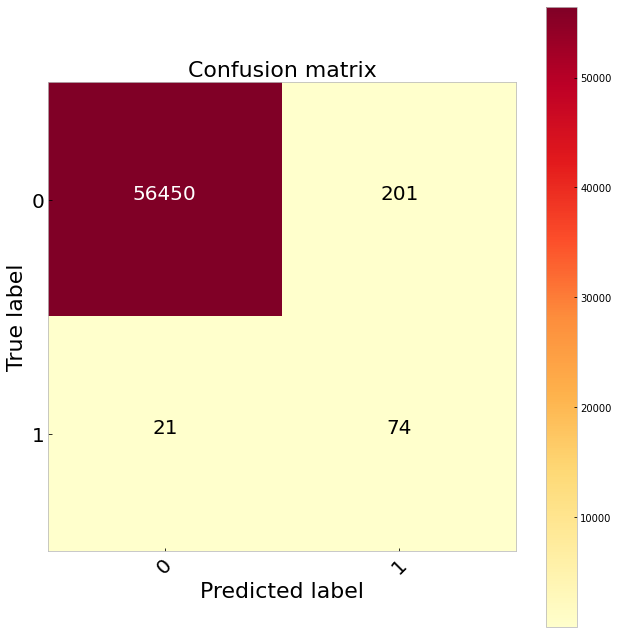

In [47]:
y_pred = pipeline.predict(X_test)
probs = pipeline.predict_proba(X_test)[:,1]


cm = confusion_matrix(y_test, y_pred) 
plot_confusion_matrix(cm, classes = [0, 1])

print('\nf1       :',f1_score(y_test, y_pred))
print('recall   :',recall_score(y_test, y_pred))
print('precision:',precision_score(y_test, y_pred))
print('roc auc  :',roc_auc_score(y_test, probs))

Best Threshold=0.002009, G-Mean=0.908
 


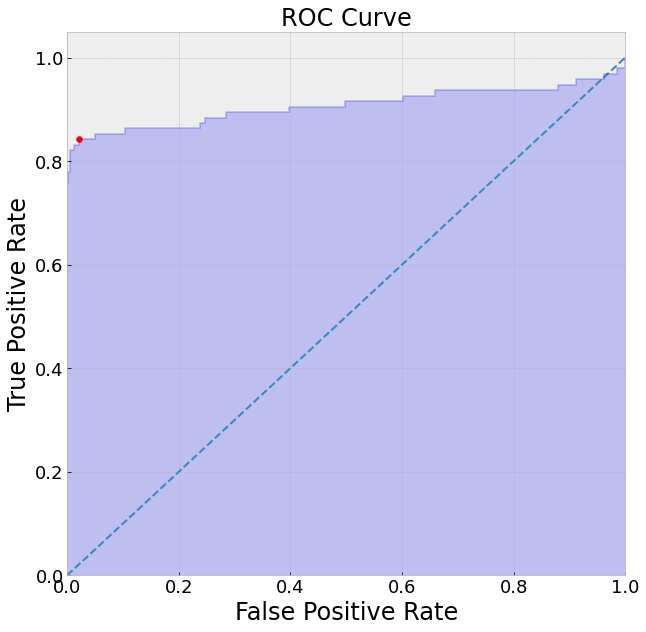

In [48]:
plot_roc_curve(y_test, probs)
print(' ')

Confusion matrix, without normalization
[[55476  1175]
 [   15    80]]

f1       : 0.11851851851851852
recall   : 0.8421052631578947
precision: 0.06374501992031872
roc auc  : 0.906650042875631


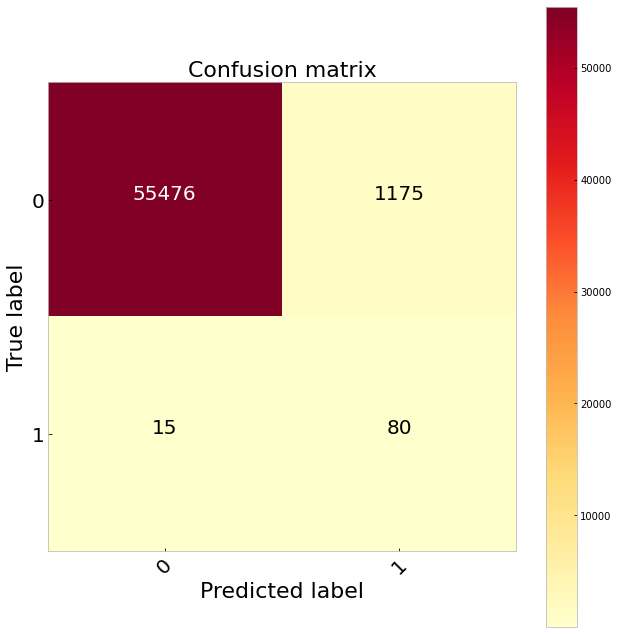

In [55]:
y_pred = (pipeline.predict_proba(X_test)[:,1] >= 0.002009).astype(bool)

cm = confusion_matrix(y_test, y_pred) 
plot_confusion_matrix(cm, classes = [0, 1])

print('\nf1       :',f1_score(y_test, y_pred))
print('recall   :',recall_score(y_test, y_pred))
print('precision:',precision_score(y_test, y_pred))
print('roc auc  :',roc_auc_score(y_test, probs))